In [1]:
from __future__ import division, absolute_import, print_function
%load_ext autoreload
%autoreload 2

import os 
print(os.getcwd()) 
    
#import hepran
#import hepran.bzipscore as bz
#import hepran.bcipa as bc
#import hepran.utils as u
#import hepran.registers as r
#import hepran.agadir as ag

import pandas as pd
import numpy as np
import seaborn as sns
    
%matplotlib inline

import matplotlib as mpl
import matplotlib.pylab as plt

import sklearn as sk


CCO = os.environ.get("CCO",r"C:\Projekti_KI\ortoCC\CoiledCoilOrtho")

from score_utils import *


d:\data\ortoCC\fine_tune_scoring_function


In [1]:
from interactive_set_plot import *

import bokeh
import bokeh.resources
import bokeh.plotting as bp
from bokeh.models import HoverTool
from IPython.core.display import display, HTML
import hepran
bp.output_notebook()

import sklearn
from sklearn import linear_model
from sklearn.externals import joblib

from IPython.display import display, HTML

Loading BokehJS ...

In [3]:
df = pd.read_excel('data/round0_fiting.xlsx',index_col=[0,1])

In [4]:
fit_metrics_all =  get_metrics_df().set_index('N_iter fit_type fit_class'.split())
model_features_all = get_features_df().set_index("N_iter fit_type".split())

In [5]:
def set_weights(name, df):
    
    df['weights'] = 1
    if name == "W10L15H55":
        df['weights'] = 1
        df.loc[df.Tm < 15, 'weights'] = 10
        df.loc[df.Tm > 55, 'weights'] = 10
        df.loc[df.on_target, 'weights'] = 10
    if name == "W10L15H50":
        df['weights'] = 1
        df.loc[df.Tm < 15, 'weights'] = 10
        df.loc[df.Tm > 50, 'weights'] = 10
        df.loc[df.on_target, 'weights'] = 10
    if name == "W10":
        df.loc[df.on_target, 'weights'] = 10
    if name == "W10L":
        df['weights'] = 1
        df.loc[df.Tm < 15, 'weights'] = 10
        df.loc[df.on_target, 'weights'] = 10

In [6]:
basic = 'c_NN c_IN c_II es_EE es_EK es_KK'.split()
nterm_core = 'nterm_c_NN nterm_c_IN nterm_c_II'.split()
cterm_core = 'cterm_c_NN cterm_c_IN cterm_c_II'.split()
core_ends = nterm_core + cterm_core 

core_vertical = 'cv_NN cv_II cv_NI cv_IN'.split()
es_vertical = 'esv_KK esv_EE esv_EK esv_KE'.split()

core_t_vertical = 'cvt_INI cvt_IIN cvt_NII cvt_NNI cvt_NNN cvt_NIN cvt_INN cvt_III'.split()
es_t_vertical = 'esvt_EKK esvt_EEK esvt_EEE esvt_EKE esvt_KEE esvt_KKK esvt_KKE esvt_KEK'.split()
interface_rep = ['interface_repulsion']

fit_fields_dic = {
    "basic": basic,
    "basic-ends": basic + core_ends,
    "basic-rep": basic + interface_rep,
    "basic-ends_rep": basic + core_ends + interface_rep,
    "basic-rep-core_vertical": basic + interface_rep + core_vertical, 
    "basic-rep-nter_core-vertical_t_all": basic + interface_rep + nterm_core + core_t_vertical + es_t_vertical,
    "basic-rep-core_t_vertical": basic + interface_rep +  core_t_vertical,
    "basic-rep-nter_core-core_vertical": basic + interface_rep + nterm_core + core_vertical,
    "basic-rep-core_vertical": basic + interface_rep + core_vertical,
    "basic-rep-es_t_vertical": basic + interface_rep + es_t_vertical,
    "basic-rep-core_vertical": basic + interface_rep +  core_vertical,
    "basic-rep-nter_core": basic + interface_rep + nterm_core,
}

In [7]:
fit_type_string = "basic-rep-core_vertical"
lm_type = "Ridge" #Ridge, ElasticNet, SGDRegressor, BayesianRidge
weight_string="W1" #W1 W10 W10L15H50 W10L15H55

In [8]:
# Parameters
lm_type = "Ridge"
weight_string = "W10"
fit_type_string = "basic-rep-core_vertical"


In [9]:
def get_FIT_dataframe(df, lm, N_iter, fit_type, N_feat, N_samples):
    r = get_metrics_df()
    
    Q=df
    r=r.append(
        get_FIT_metrics(Q.Tm, Q.score, Q.weights, N_iter, fit_type, fit_class='all', N_feat=len(lm.coef_)+1, N_samples=len(Q)) ,
        ignore_index=True)
    
    Q=df.query('Tm>25')
    r=r.append(
        get_FIT_metrics(Q.Tm, Q.score, Q.weights, N_iter, fit_type, fit_class='Tm>25', N_feat=len(lm.coef_)+1, N_samples=len(Q)) ,
        ignore_index=True)

    Q=df.query('Tm>55')
    r=r.append(
        get_FIT_metrics(Q.Tm, Q.score, Q.weights, N_iter, fit_type, fit_class='Tm>55', N_feat=len(lm.coef_)+1, N_samples=len(Q)) ,
        ignore_index=True)
    
    Q=df.query('on_target')
    r=r.append(
        get_FIT_metrics(Q.Tm, Q.score, Q.weights, N_iter, fit_type, fit_class='on_target', N_feat=len(lm.coef_)+1, N_samples=len(Q)) ,
        ignore_index=True)
    
    r = r.set_index('N_iter fit_type fit_class'.split())
    return r                

Iteration:  0
Num points:  172


corrR  R2_score  \
N_iter fit_type                          fit_class                       
0      basic-rep-core_vertical-W10-Ridge all        0.697106  0.782023   
                                         Tm>25      0.669347  0.677782   
                                         Tm>55      0.773538 -0.775405   
                                         on_target  0.500098 -0.013482   

                                                         RMSE  med_abs_err  \
N_iter fit_type                          fit_class                           
0      basic-rep-core_vertical-W10-Ridge all        10.901917     2.788044   
                                         Tm>25       9.288118     2.750845   
                                         Tm>55       6.248534     2.337023   
                                         on_target   6.244270     2.305497   

                                                    explained_var  Baysian_IC  \
N_iter fit_type                          fit_class                              
0      basic-rep-core_vertical-W10-Ridge all             0.462099  883.564841   
                                         Tm>25           0.309398  478.106352   
                                         Tm>55           0.013135   82.974400   
                                         on_target       0.118559   73.778822   

                                                      Akaike_IC N_samples  \
N_iter fit_type                          fit_class                          
0      basic-rep-core_vertical-W10-Ridge all        1731.163958       172   
                                         Tm>25       880.078134        95   
                                         Tm>55       112.252515        14   
                                         on_target    97.778822        12   

                                                   N_feat  
N_iter fit_type                          fit_class         
0      basic-rep-core_vertical-W10-Ridge all           12  
                                         Tm>25         12  
                                         Tm>55         12  
                                         on_target     12

feature      coef
N_iter fit_type                                                        
0      basic-rep-core_vertical-W10-Ridge                 c_NN  1.611932
       basic-rep-core_vertical-W10-Ridge                 c_IN -3.223865
       basic-rep-core_vertical-W10-Ridge                 c_II  1.611932
       basic-rep-core_vertical-W10-Ridge                es_EE -2.595496
       basic-rep-core_vertical-W10-Ridge                es_EK  3.076863
       basic-rep-core_vertical-W10-Ridge                es_KK -0.481367
       basic-rep-core_vertical-W10-Ridge  interface_repulsion -0.318218
       basic-rep-core_vertical-W10-Ridge                cv_NN -1.534378
       basic-rep-core_vertical-W10-Ridge                cv_II  1.554891
       basic-rep-core_vertical-W10-Ridge                cv_NI  2.171218
       basic-rep-core_vertical-W10-Ridge                cv_IN -2.191730

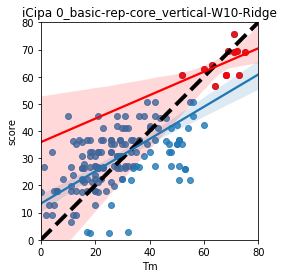

In [10]:
fit_type = fit_type_string
fit_fields = fit_fields_dic[fit_type_string]

set_weights(weight_string, df)
if weight_string:
    fit_type += "-" + weight_string


Q=df
N_iter = 0
print("Iteration: ", N_iter)
print("Num points: ", len(Q))
lm, R2 = make_model('Tm', fit_fields, Q, lm_type)
fit_type += "-" + lm_type 

df['score'] = lm.predict(df[fit_fields])
df['pos'] = 0



df = df.apply(get_formated_seq, axis=1)
df['IDs']=df.index
title = str(N_iter)+"_"+fit_type
#bp.output_file(title=title, filename='models\\{title}.plot.html'.format(**locals()))
p = draw_scatter_interactive('Tm','score',df, y_range=(0,80),                                
                                 title=title, save_to_file=False)


bp.show(p)

mpl_plot_fit(title, df)

fit_metric = get_FIT_dataframe(Q, lm, N_iter, fit_type, N_feat=len(lm.coef_)+1, N_samples=len(Q))
fit_metrics_all = fit_metrics_all.append(fit_metric)
display(fit_metric)
model_features = get_model_features(lm, fit_fields, N_iter, fit_type)
model_features_all = model_features_all.append(model_features)
display(model_features)



joblib.dump(lm, 'models/{title}.model'.format(**locals())); 
df.to_excel('models/{title}.score.xlsx'.format(**locals()));
bp.save(p, title=title, filename='models\\{title}.plot.html'.format(**locals()), resources=bokeh.resources.CDN);

corrR  R2_score  \
N_iter fit_type                          fit_class                       
1      basic-rep-core_vertical-W10-Ridge all        0.811583  0.858711   
                                         Tm>25      0.786634  0.775673   
                                         Tm>55      0.781232 -0.341021   
                                         on_target  0.545257  0.249627   

                                                        RMSE  med_abs_err  \
N_iter fit_type                          fit_class                          
1      basic-rep-core_vertical-W10-Ridge all        8.777100     2.618432   
                                         Tm>25      7.749856     2.262462   
                                         Tm>55      5.430591     2.104784   
                                         on_target  5.372943     2.026706   

                                                    explained_var  Baysian_IC  \
N_iter fit_type                          fit_class                              
1      basic-rep-core_vertical-W10-Ridge all             0.655280  808.988178   
                                         Tm>25           0.549634  443.704636   
                                         Tm>55          -0.348990   79.046032   
                                         on_target       0.266974   70.171900   

                                                      Akaike_IC N_samples  \
N_iter fit_type                          fit_class                          
1      basic-rep-core_vertical-W10-Ridge all        1656.587294       172   
                                         Tm>25       845.676418        95   
                                         Tm>55       108.324147        14   
                                         on_target    94.171900        12   

                                                   N_feat  
N_iter fit_type                          fit_class         
1      basic-rep-core_vertical-W10-Ridge all           12  
                                         Tm>25         12  
                                         Tm>55         12  
                                         on_target     12

feature      coef
N_iter fit_type                                                        
1      basic-rep-core_vertical-W10-Ridge                 c_NN -1.325157
       basic-rep-core_vertical-W10-Ridge                 c_IN -4.179761
       basic-rep-core_vertical-W10-Ridge                 c_II  8.259097
       basic-rep-core_vertical-W10-Ridge                es_EE -1.083553
       basic-rep-core_vertical-W10-Ridge                es_EK  5.469092
       basic-rep-core_vertical-W10-Ridge                es_KK  1.122818
       basic-rep-core_vertical-W10-Ridge  interface_repulsion -0.239889
       basic-rep-core_vertical-W10-Ridge                cv_NN  0.994094
       basic-rep-core_vertical-W10-Ridge                cv_II  2.311831
       basic-rep-core_vertical-W10-Ridge                cv_NI  3.025828
       basic-rep-core_vertical-W10-Ridge                cv_IN -0.823397

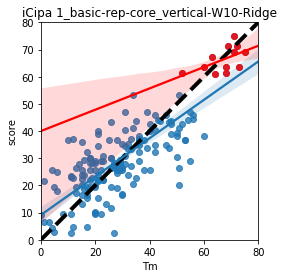

In [11]:
N_iter = 1
seqs = df

%run -i 08_aligned_fit_DO_ITER.py

corrR  R2_score  \
N_iter fit_type                          fit_class                       
2      basic-rep-core_vertical-W10-Ridge all        0.828300  0.869301   
                                         Tm>25      0.796175  0.779795   
                                         Tm>55      0.770052 -0.303466   
                                         on_target  0.546903  0.243125   

                                                        RMSE  med_abs_err  \
N_iter fit_type                          fit_class                          
2      basic-rep-core_vertical-W10-Ridge all        8.441757     2.408788   
                                         Tm>25      7.678318     2.399719   
                                         Tm>55      5.354010     2.211853   
                                         on_target  5.396172     2.050246   

                                                    explained_var  Baysian_IC  \
N_iter fit_type                          fit_class                              
2      basic-rep-core_vertical-W10-Ridge all             0.685482  795.587458   
                                         Tm>25           0.566224  441.942623   
                                         Tm>55          -0.149808   78.648371   
                                         on_target       0.248567   70.275434   

                                                      Akaike_IC N_samples  \
N_iter fit_type                          fit_class                          
2      basic-rep-core_vertical-W10-Ridge all        1643.186575       172   
                                         Tm>25       843.914405        95   
                                         Tm>55       107.926485        14   
                                         on_target    94.275434        12   

                                                   N_feat  
N_iter fit_type                          fit_class         
2      basic-rep-core_vertical-W10-Ridge all           12  
                                         Tm>25         12  
                                         Tm>55         12  
                                         on_target     12

feature       coef
N_iter fit_type                                                         
2      basic-rep-core_vertical-W10-Ridge                 c_NN  -4.463846
       basic-rep-core_vertical-W10-Ridge                 c_IN  -4.459296
       basic-rep-core_vertical-W10-Ridge                 c_II  12.479663
       basic-rep-core_vertical-W10-Ridge                es_EE  -0.561089
       basic-rep-core_vertical-W10-Ridge                es_EK   6.087210
       basic-rep-core_vertical-W10-Ridge                es_KK   1.586922
       basic-rep-core_vertical-W10-Ridge  interface_repulsion  -0.237646
       basic-rep-core_vertical-W10-Ridge                cv_NN   1.546377
       basic-rep-core_vertical-W10-Ridge                cv_II   2.762226
       basic-rep-core_vertical-W10-Ridge                cv_NI   3.548952
       basic-rep-core_vertical-W10-Ridge                cv_IN  -0.744511

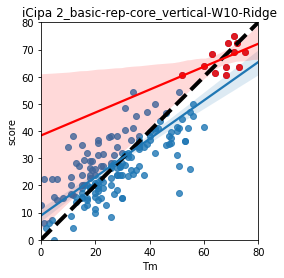

In [12]:
seqs['seq1'] = df['seq1']
seqs['seq2'] = df['seq2']
N_iter += 1

%run -i 08_aligned_fit_DO_ITER.py

corrR  R2_score  \
N_iter fit_type                          fit_class                       
3      basic-rep-core_vertical-W10-Ridge all        0.827163  0.869067   
                                         Tm>25      0.794252  0.779616   
                                         Tm>55      0.770486 -0.280441   
                                         on_target  0.553530  0.261090   

                                                        RMSE  med_abs_err  \
N_iter fit_type                          fit_class                          
3      basic-rep-core_vertical-W10-Ridge all        8.449321     2.436660   
                                         Tm>25      7.681449     2.411404   
                                         Tm>55      5.306512     2.225815   
                                         on_target  5.331747     1.984119   

                                                    explained_var  Baysian_IC  \
N_iter fit_type                          fit_class                              
3      basic-rep-core_vertical-W10-Ridge all             0.683430  795.895551   
                                         Tm>25           0.561803  442.020075   
                                         Tm>55          -0.165824   78.398859   
                                         on_target       0.266854   69.987175   

                                                      Akaike_IC N_samples  \
N_iter fit_type                          fit_class                          
3      basic-rep-core_vertical-W10-Ridge all        1643.494668       172   
                                         Tm>25       843.991857        95   
                                         Tm>55       107.676974        14   
                                         on_target    93.987175        12   

                                                   N_feat  
N_iter fit_type                          fit_class         
3      basic-rep-core_vertical-W10-Ridge all           12  
                                         Tm>25         12  
                                         Tm>55         12  
                                         on_target     12

feature       coef
N_iter fit_type                                                         
3      basic-rep-core_vertical-W10-Ridge                 c_NN  -4.936720
       basic-rep-core_vertical-W10-Ridge                 c_IN  -4.508699
       basic-rep-core_vertical-W10-Ridge                 c_II  12.871993
       basic-rep-core_vertical-W10-Ridge                es_EE  -0.703960
       basic-rep-core_vertical-W10-Ridge                es_EK   6.101002
       basic-rep-core_vertical-W10-Ridge                es_KK   1.456104
       basic-rep-core_vertical-W10-Ridge  interface_repulsion  -0.226530
       basic-rep-core_vertical-W10-Ridge                cv_NN   1.765425
       basic-rep-core_vertical-W10-Ridge                cv_II   2.422763
       basic-rep-core_vertical-W10-Ridge                cv_NI   3.465728
       basic-rep-core_vertical-W10-Ridge                cv_IN  -0.800770

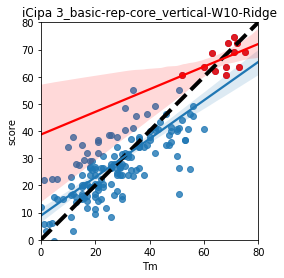

In [13]:
seqs['seq1'] = df['seq1']
seqs['seq2'] = df['seq2']
N_iter += 1

%run -i 08_aligned_fit_DO_ITER.py

corrR  R2_score  \
N_iter fit_type                          fit_class                       
4      basic-rep-core_vertical-W10-Ridge all        0.827115  0.869075   
                                         Tm>25      0.794162  0.779718   
                                         Tm>55      0.770795 -0.276166   
                                         on_target  0.554403  0.262941   

                                                        RMSE  med_abs_err  \
N_iter fit_type                          fit_class                          
4      basic-rep-core_vertical-W10-Ridge all        8.449078     2.430482   
                                         Tm>25      7.679671     2.417866   
                                         Tm>55      5.297647     2.221994   
                                         on_target  5.325063     1.982621   

                                                    explained_var  Baysian_IC  \
N_iter fit_type                          fit_class                              
4      basic-rep-core_vertical-W10-Ridge all             0.683314  795.885642   
                                         Tm>25           0.561380  441.976103   
                                         Tm>55          -0.161658   78.352045   
                                         on_target       0.268840   69.957067   

                                                      Akaike_IC N_samples  \
N_iter fit_type                          fit_class                          
4      basic-rep-core_vertical-W10-Ridge all        1643.484758       172   
                                         Tm>25       843.947885        95   
                                         Tm>55       107.630160        14   
                                         on_target    93.957067        12   

                                                   N_feat  
N_iter fit_type                          fit_class         
4      basic-rep-core_vertical-W10-Ridge all           12  
                                         Tm>25         12  
                                         Tm>55         12  
                                         on_target     12

feature       coef
N_iter fit_type                                                         
4      basic-rep-core_vertical-W10-Ridge                 c_NN  -4.895519
       basic-rep-core_vertical-W10-Ridge                 c_IN  -4.542562
       basic-rep-core_vertical-W10-Ridge                 c_II  12.808433
       basic-rep-core_vertical-W10-Ridge                es_EE  -0.752785
       basic-rep-core_vertical-W10-Ridge                es_EK   6.067346
       basic-rep-core_vertical-W10-Ridge                es_KK   1.426142
       basic-rep-core_vertical-W10-Ridge  interface_repulsion  -0.226283
       basic-rep-core_vertical-W10-Ridge                cv_NN   1.766337
       basic-rep-core_vertical-W10-Ridge                cv_II   2.368536
       basic-rep-core_vertical-W10-Ridge                cv_NI   3.426675
       basic-rep-core_vertical-W10-Ridge                cv_IN  -0.820844

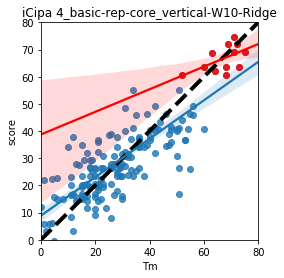

In [14]:
seqs['seq1'] = df['seq1']
seqs['seq2'] = df['seq2']
N_iter += 1

%run -i 08_aligned_fit_DO_ITER.py

corrR  R2_score  \
N_iter fit_type                          fit_class                       
5      basic-rep-core_vertical-W10-Ridge all        0.827367  0.869196   
                                         Tm>25      0.793748  0.779850   
                                         Tm>55      0.771581 -0.272602   
                                         on_target  0.550856  0.260073   

                                                        RMSE  med_abs_err  \
N_iter fit_type                          fit_class                          
5      basic-rep-core_vertical-W10-Ridge all        8.445159     2.423737   
                                         Tm>25      7.677362     2.421193   
                                         Tm>55      5.290244     2.208530   
                                         on_target  5.335414     1.992966   

                                                    explained_var  Baysian_IC  \
N_iter fit_type                          fit_class                              
5      basic-rep-core_vertical-W10-Ridge all             0.683852  795.726044   
                                         Tm>25           0.562824  441.918971   
                                         Tm>55          -0.159980   78.312892   
                                         on_target       0.265294   70.003675   

                                                      Akaike_IC N_samples  \
N_iter fit_type                          fit_class                          
5      basic-rep-core_vertical-W10-Ridge all        1643.325160       172   
                                         Tm>25       843.890753        95   
                                         Tm>55       107.591007        14   
                                         on_target    94.003675        12   

                                                   N_feat  
N_iter fit_type                          fit_class         
5      basic-rep-core_vertical-W10-Ridge all           12  
                                         Tm>25         12  
                                         Tm>55         12  
                                         on_target     12

feature       coef
N_iter fit_type                                                         
5      basic-rep-core_vertical-W10-Ridge                 c_NN  -5.105982
       basic-rep-core_vertical-W10-Ridge                 c_IN  -4.364357
       basic-rep-core_vertical-W10-Ridge                 c_II  13.126444
       basic-rep-core_vertical-W10-Ridge                es_EE  -0.582255
       basic-rep-core_vertical-W10-Ridge                es_EK   6.240859
       basic-rep-core_vertical-W10-Ridge                es_KK   1.653605
       basic-rep-core_vertical-W10-Ridge  interface_repulsion  -0.226792
       basic-rep-core_vertical-W10-Ridge                cv_NN   1.763146
       basic-rep-core_vertical-W10-Ridge                cv_II   2.642212
       basic-rep-core_vertical-W10-Ridge                cv_NI   3.549396
       basic-rep-core_vertical-W10-Ridge                cv_IN  -0.642545

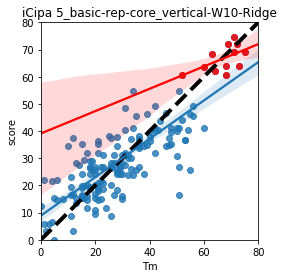

In [15]:
seqs['seq1'] = df['seq1']
seqs['seq2'] = df['seq2']
N_iter += 1

%run -i 08_aligned_fit_DO_ITER.py

In [16]:
fit_metrics_all.to_csv('models/{fit_type}.metrics.csv'.format(**locals()) ) 
model_features_all.to_csv('models/{fit_type}.metrics.csv'.format(**locals()) ) 